# Question 1
* Learn and understand Zipf’s Law.
* Pick any file (or files) in NLTK package.
* Prove if Zipf’s Law works in Natural Language or not. 
* REQUIREMNTS: (Must Do)
- Use ’glob’ to open and read file. If read multiple files use LOOP to achieve.
- Create at least one function and one lambda function.
- Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK. 
- Open your CSV file,generate a log-log figure according to the data you saved.
- Write a conclusion at the end of your code base on your figure.

In [83]:
from nltk.corpus import gutenberg
import glob
import string
import csv
import re
import matplotlib.pyplot as mplp
from matplotlib import style

In [84]:
pun = re.compile('.*[A-Za-z].*')
rmpunt = lambda p: [u for u in p if pun.match(u)]

In [ ]:
#pun = set(string.punctuation)
#pun.add('."')
#pun.add(',"')
#pun.add('?"')
#pun.add('!"')
#pun.add('--')
#pun.add('!--')
#pun.add('(*)')
#pun.add("....'")
#pun.add(':,')
#rmpunt = lambda p: [u for u in p if u not in pun]

In [85]:
def low(l):
    w=[w.lower() for w in l]
    return w

In [86]:
words = []
for textfile in glob.glob("/Users/nithinkartha/nltk_data/corpora/gutenberg/*.txt"):
    if textfile.startswith('/Users/nithinkartha/nltk_data/corpora/gutenberg/chesterton'):
         words.extend(gutenberg.words(textfile))

In [5]:
lowerwords=low(words)
filtwords=rmpunt(lowerwords)

In [87]:
wfreq = {}

for w in filtwords:                             #Checking each word in the text and incrementing their recpective repetition count.
    if w not in wfreq:
        wfreq[w] = 1
    else:
        wfreq[w] += 1

In [88]:
with open('wordrank.csv', 'w') as csvfile:
    fieldnames = ['Word', 'Rank', 'Frequency']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    i=0
    for x in sorted(wfreq, key=wfreq.get, reverse=True):
        i +=1
        writer.writerow({'Word': x, 'Rank': i, 'Frequency': wfreq[x]})

In [89]:
with open('wordrank.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        W=[]
        R=[]
        F=[]
        for row in reader:
            W.append(row[0])
            R.append(row[1])
            F.append(row[2])
R.remove('Rank')
F.remove('Frequency')

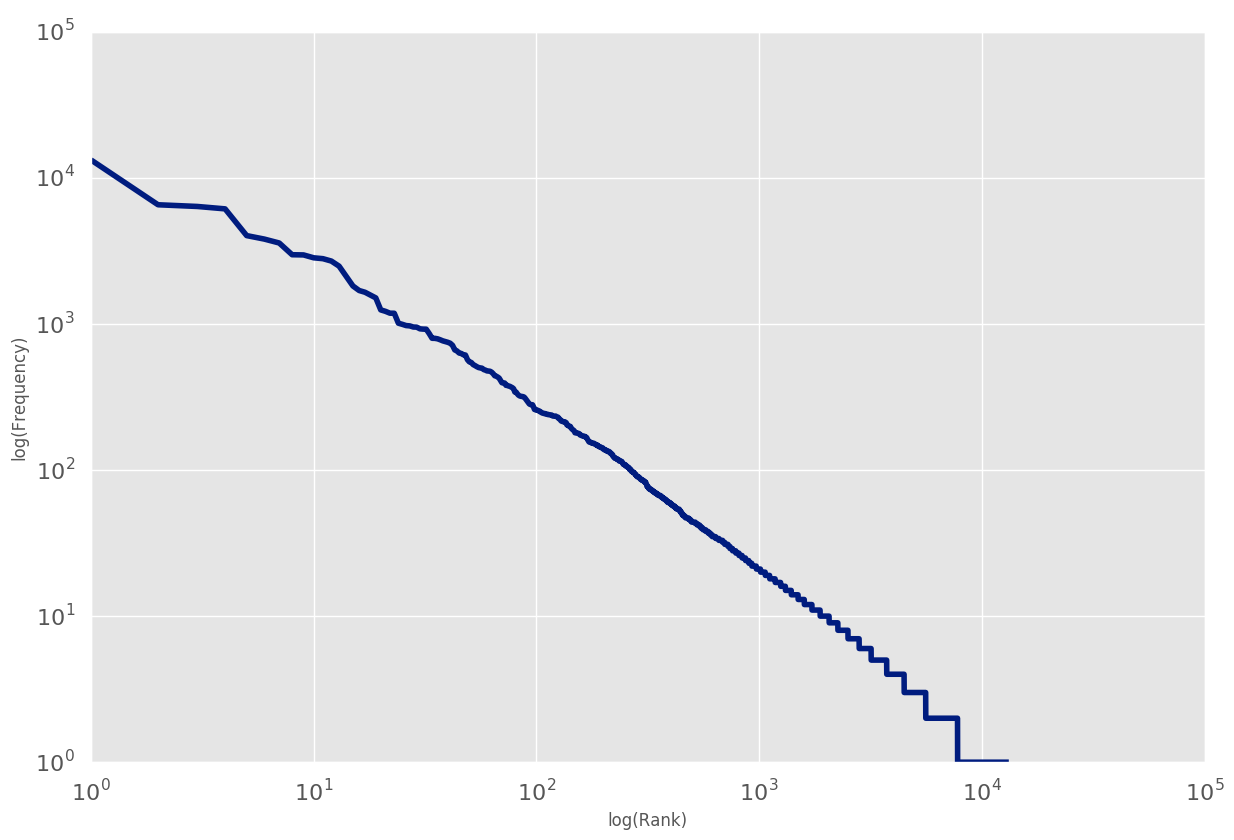

In [103]:
mplp.style.use('ggplot')
mplp.style.use('seaborn-dark-palette')

mplp.loglog(R,F)
mplp.title("Zipf’s Law")
mplp.ylabel('log(Frequency)')
mplp.xlabel('log(Rank)')
mplp.show()


# Conclusion
